# Study the data statistics of the pep-3k dataset (train).
29.11.2023

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Please replace the following paths with your own paths if you are using different ones.
PROJECT_PATH = "<root_dir_of_this_repo>"
DATA_PATH = PROJECT_PATH + "datasets/pep-3k/train-dev-test-split/"
CACHE_PATH = PROJECT_PATH + "cache/"

## Train

In [3]:
train_set_df = pd.read_csv(DATA_PATH + "train.csv", sep=',')
train_set_df

,label,text
0,1,dog shake cat
1,1,student climb ship
2,1,pipe vent vapor
3,0,chef burn air
4,0,boat crush air
...,...,...
2444,0,wool clip dust
2445,1,rope hook pan
2446,0,bag contain tree
2447,1,gorilla bury leaf


### Check texts

In [4]:
texts = train_set_df['text'].tolist()
print(len(texts))
texts_set = list(set(texts))
print(len(texts_set))

2449
2449


In [5]:
# Get vocabulary from texts.

from itertools import chain
words = [text.split(" ") for text in texts]
words = list(chain(*words))
print(len(words))

vocab = list(set(words))
print(len(vocab))

7347
561


### Check labels

In [6]:
labels = train_set_df['label'].tolist()
print(len(labels))
labels_set = list(set(labels))
print(len(labels_set))
labels_set

2449
2


[0, 1]

In [7]:
label_counter = dict(Counter(labels))

# Sort the data in descending order.
label_counter = {k: v for k, v in sorted(label_counter.items(), key=lambda item: item[1], reverse=True)}
label_counter

{0: 1227, 1: 1222}

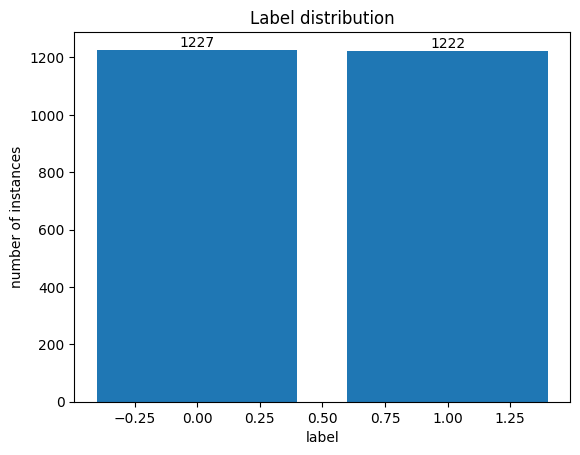

In [8]:
# Create a bar diagram
plt.bar(label_counter.keys(), label_counter.values())

# Add title and labels
plt.title('Label distribution')
plt.xlabel('label')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in label_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()